Feature Complexity
Number of Features (n_features=10):
The dataset has 10 features (columns), which introduces moderate complexity. If the number of features increases significantly, models may require more computation and may risk overfitting without proper regularization.

Informative Features (n_informative=5):
Only 5 of the 10 features are actually relevant for predicting the target variable. The remaining 5 are random noise (non-informative), making feature selection or dimensionality reduction important for interpretable models.

2. Linear vs. Nonlinear Relationships
make_regression generates datasets based on linear relationships between features and the target variable. This means the data is low-complexity in terms of patterns, as nonlinear relationships are not introduced.

Complexity can be increased by modifying features or adding custom transformations.

3. Noise Level (noise=0.2)
The noise parameter adds Gaussian noise to the target variable:
Low noise (0.2): Ensures the target is only slightly perturbed, preserving a strong signal-to-noise ratio. This keeps the dataset relatively simple to model and learn.
4. Bias (bias=1.5)
A constant value is added to the target variable, which does not affect the complexity significantly, as most models (e.g., linear regression) can handle constant shifts effortlessly.
5. Number of Samples (n_samples=1000)
With 1000 samples, the dataset provides enough observations for robust training, even for more complex models like ANNs or ensemble methods. It is unlikely to overfit with this sample size unless the model is excessively complex.
Overall Complexity
This dataset is considered moderate complexity:

Linear relationships make it simpler to model.
A mix of informative and non-informative features requires the model to identify relevant features.
Low noise ensures the signal is strong, aiding learning.
Dimensionality (10 features) is manageable for most regression models without preprocessing.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from torchsummary import summary
import pandas as pd
import time

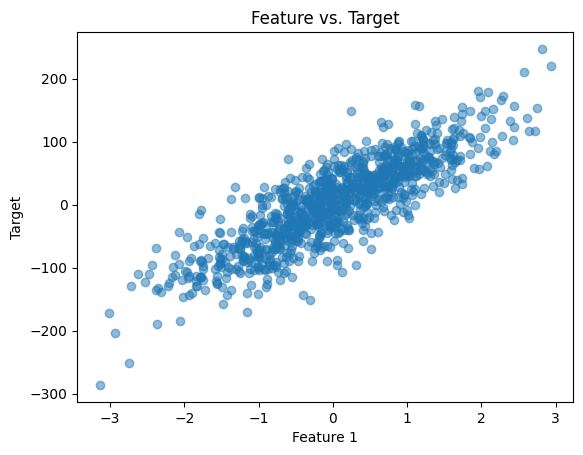

C:\Users\ozair\AppData\Local\Temp\ipykernel_22280\2372140448.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


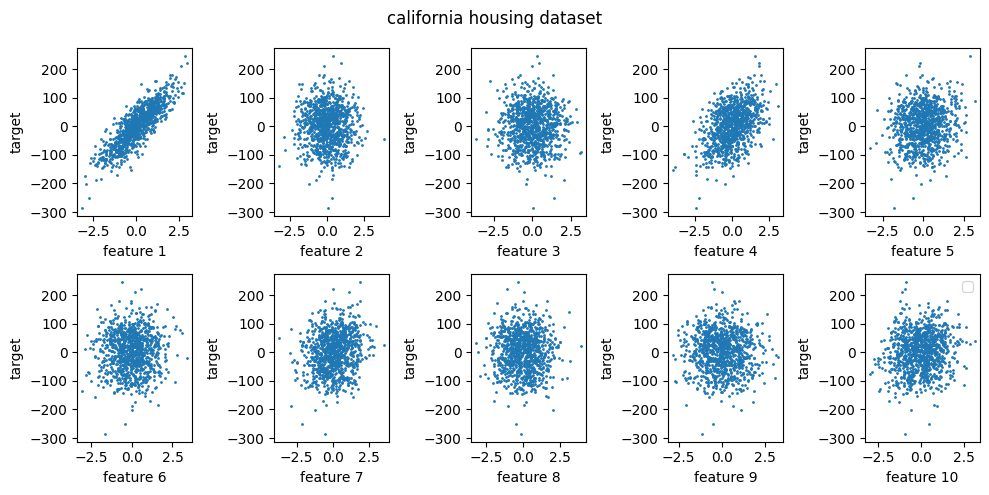

In [8]:
from sklearn.datasets import make_regression

# Generate the dataset
X, y = make_regression(
    n_samples=1000,        # Number of samples
    n_features=10,         # Number of features
    n_informative=5,       # Number of informative features
    noise=0.2,             # Noise level
    bias=1.5,              # Bias in target
    random_state=42        # Seed for reproducibility
)

# Plot the first feature against the target
plt.scatter(X[:, 0], y, alpha=0.5)
plt.title("Feature vs. Target")
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.savefig(f'dataset.png',dpi=500)
plt.show()


fig, axs=plt.subplots(2,5,figsize=(10, 5))
fig.suptitle("california housing dataset")
for i in range(2):
    for j in range(5):
        n=j+i*5
        ft=f"feature {n+1}"
        axs[i,j].scatter(X[:,n],y,s=1)
        axs[i,j].set_xlabel(ft)
        axs[i,j].set_ylabel("target")

plt.tight_layout()
plt.legend()
plt.show()


In [20]:
#define a simple ANN.
class ANNModel(nn.Module):
    def __init__(self, input_size):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)
#model = ANNModel(X_train.shape[1])
#model.cuda()
#summary(model,input_size=(1,X_train.shape[1]))
#print()

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
###################
print("Before Normalization")
#for i in range(5):
    #print(f"features: {X_train[i].tolist()},label: {y_train[i].item()}")
X_train_df = pd.DataFrame(X_train, columns=[f"Feature_{i+1}" for i in range(X_train.shape[1])])
X_train_df['Target'] = y_train
print(X_train_df.head())
########################
#Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_trainscaled = scaler.fit_transform(y_train.reshape(-1,1))
y_testscaled=scaler.fit_transform(y_test.reshape(-1,1))
#y_pred_original = scaler.inverse_transform(y_trainscaled)


# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_trainscaled, dtype=torch.float32).view(-1,1)
y_test = torch.tensor(y_testscaled, dtype=torch.float32).view(-1,1)
#######################################
print("\n\nAfter Normalization")
X_train_df = pd.DataFrame(X_train.numpy(), columns=[f"Feature_{i+1}" for i in range(X_train.shape[1])])
X_train_df['Target'] = y_train.numpy()

# Print first few rows
print(X_train_df.head())
##############################

Before Normalization
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -1.519370   0.774634  -0.707669  -1.260884   2.122156   0.443819   
1   0.180071  -0.497354   1.097220   0.049328  -0.365281   0.867187   
2   0.492884  -1.494756   1.165917  -1.320878   0.001110  -1.666763   
3  -0.337878   0.467690  -0.457219   0.335054  -0.212090  -0.689112   
4   0.173181  -1.142970   0.153725  -0.446515   0.214094   0.058209   

   Feature_7  Feature_8  Feature_9  Feature_10     Target  
0   0.917862  -0.484234   1.266911    1.032465 -93.363889  
1   0.722447  -0.272933  -0.835689    2.387968  41.091321  
2   0.771402   0.833603  -0.601127   -1.544434 -19.212088  
3   0.564789   0.002232  -0.274644    0.542203   1.944542  
4   0.856399   0.385317  -0.883857   -1.245739  -3.787446  


After Normalization
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -1.499310   0.776014  -0.693376  -1.273077   2.252707   0.469900   
1   0.165924  -0.568798   1.

In [5]:
print(len(X_train),len(X_test))

800 200


In [6]:
#define dataloader
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=16, shuffle=True)
print(len(train_loader))
# Define optimizers
def get_optimizer(optimizer_name, model):
    if optimizer_name == 'mBGD':
        return optim.SGD(model.parameters(), lr=0.01)
    elif optimizer_name == 'Momentum':
        return optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    elif optimizer_name == 'NAG':
        return optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
    elif optimizer_name == 'Adagrad':
        return optim.Adagrad(model.parameters(), lr=0.01)
    elif optimizer_name == 'RMSProp':
        return optim.RMSprop(model.parameters(), lr=0.01)
    elif optimizer_name == 'Adam':
        return optim.Adam(model.parameters(), lr=0.01)
    else:
        raise ValueError("Unsupported optimizer!")

50


In [7]:

dict_Tloss = {}
dict_Vloss= {}
dict_Tt={}


In [8]:
#from sklearn.metrics import r2_score

n_epochs=100
optimizers = ['mBGD', 'Momentum', 'NAG', 'Adagrad', 'RMSProp', 'Adam']
for opt_name in optimizers:
    print(f"Training with {opt_name} optimizer...")
    torch.manual_seed(42)
    # Initialize model and optimizer
    model = ANNModel(X_train.shape[1])
    optimizer = get_optimizer(opt_name, model)
    criterion = nn.MSELoss() #nn.HuberLoss(delta=1.0)#nn.L1Loss()
    
    # Training loop
    tt=[]
    losses = []
    vlosses=[]
    for epoch in range(n_epochs):
        epoch_loss = 0
        epoch_start_time = time.time()
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            predictions = model(batch_X)
            loss = criterion(predictions, batch_y)
            loss.backward()
            optimizer.step()
            #torch.nn.utils.clip_grad_norm_(model.parameters(), 5)
            epoch_loss += loss.item()
            #print(loss.item())
        epoch_time = time.time() - epoch_start_time
        #print(epoch_time)
        tt.append(epoch_time)
        losses.append(epoch_loss / len(train_loader))
        if epoch%10 == 0:
            print(f"epoch={epoch} : loss = {epoch_loss / len(train_loader):.4f}")

        model.eval()
        with torch.no_grad():
            vloss=0
            pred=model(X_test)
            vloss = criterion(pred, y_test)
            vlosses.append(vloss.item())
            """y_=pred.numpy()
            y=y_test.numpy()
            r2s = r2_score(y, y_)
            print(f"R² Score: {r2s:.4f}")"""
    dict_Tloss[opt_name] = losses
    dict_Vloss[opt_name] = vlosses
    dict_Tt[opt_name]=tt

Training with mBGD optimizer...
epoch=0 : loss = 0.8774
epoch=10 : loss = 0.0183
epoch=20 : loss = 0.0091
epoch=30 : loss = 0.0063
epoch=40 : loss = 0.0049
epoch=50 : loss = 0.0041
epoch=60 : loss = 0.0036
epoch=70 : loss = 0.0032
epoch=80 : loss = 0.0029
epoch=90 : loss = 0.0027
Training with Momentum optimizer...
epoch=0 : loss = 0.3929
epoch=10 : loss = 0.0026
epoch=20 : loss = 0.0015
epoch=30 : loss = 0.0010
epoch=40 : loss = 0.0007
epoch=50 : loss = 0.0006
epoch=60 : loss = 0.0005
epoch=70 : loss = 0.0004
epoch=80 : loss = 0.0004
epoch=90 : loss = 0.0003
Training with NAG optimizer...
epoch=0 : loss = 0.3633
epoch=10 : loss = 0.0026
epoch=20 : loss = 0.0015
epoch=30 : loss = 0.0010
epoch=40 : loss = 0.0008
epoch=50 : loss = 0.0006
epoch=60 : loss = 0.0005
epoch=70 : loss = 0.0004
epoch=80 : loss = 0.0004
epoch=90 : loss = 0.0003
Training with Adagrad optimizer...
epoch=0 : loss = 0.1651
epoch=10 : loss = 0.0028
epoch=20 : loss = 0.0016
epoch=30 : loss = 0.0012
epoch=40 : loss = 0.

In [9]:

for name in dict_Tt:
    print(f"optimizer: {name} total training time: {sum(dict_Tt[name])}sec average time per epoch: {sum(dict_Tt[name])/n_epochs:.3f}sec")

optimizer: mBGD total training time: 6.0329978466033936sec average time per epoch: 0.060sec
optimizer: Momentum total training time: 4.922274351119995sec average time per epoch: 0.049sec
optimizer: NAG total training time: 4.6025190353393555sec average time per epoch: 0.046sec
optimizer: Adagrad total training time: 5.600338459014893sec average time per epoch: 0.056sec
optimizer: RMSProp total training time: 5.462848901748657sec average time per epoch: 0.055sec
optimizer: Adam total training time: 6.681750774383545sec average time per epoch: 0.067sec


In [10]:
#print(dict_Tloss[opt_name][3])
print(dict_Tloss)

{'mBGD': [0.8774162900447845, 0.566078542470932, 0.22582901313900947, 0.07580455731600523, 0.04189159201458097, 0.03282968452200294, 0.02789274411275983, 0.02465725409798324, 0.022325641196221113, 0.02026123920455575, 0.018346276469528675, 0.016595007572323083, 0.015356140043586493, 0.014054162125103176, 0.013134268978610635, 0.012228620466776191, 0.011409343620762229, 0.010715201897546649, 0.010057322182692587, 0.009625224340707063, 0.0090717164427042, 0.008643730264157056, 0.008236111807636916, 0.007936128722503781, 0.007656482695601881, 0.007391626541502774, 0.007131653018295765, 0.006857870263047516, 0.006631960389204323, 0.00647528596688062, 0.006279934993945063, 0.006082531083375215, 0.005894549544900656, 0.00578109166584909, 0.005623149666935206, 0.005416968464851379, 0.005327911493368447, 0.005229592709802091, 0.0051335788564756514, 0.005025291771162301, 0.004910510773770511, 0.004825179097242654, 0.004738120797555894, 0.004638630992267281, 0.004619759109336883, 0.0044867289345

In [11]:
a=[]
for i in range(1,n_epochs+1,1):
    a.append(i)

In [12]:
print(a)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


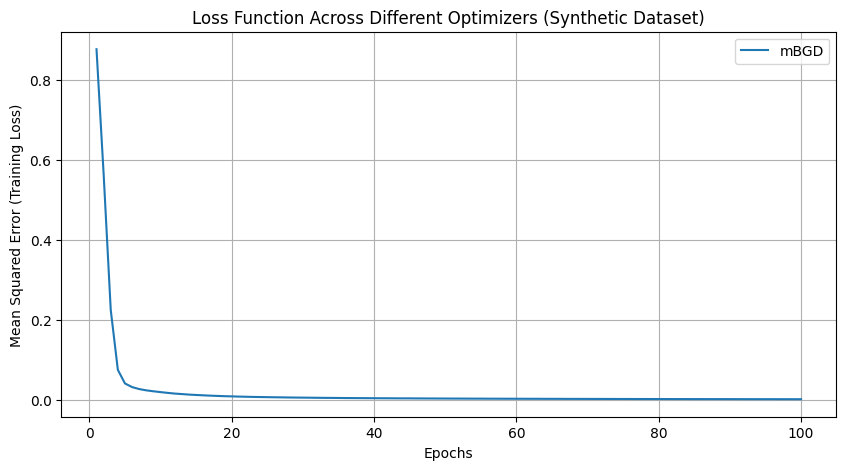

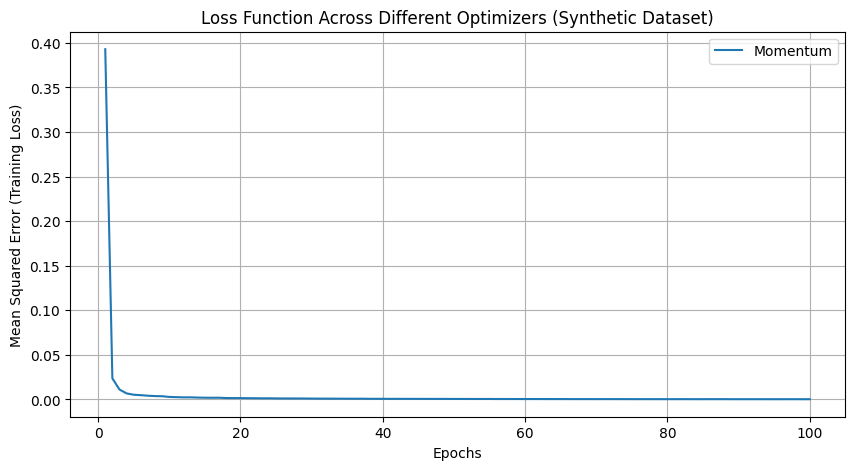

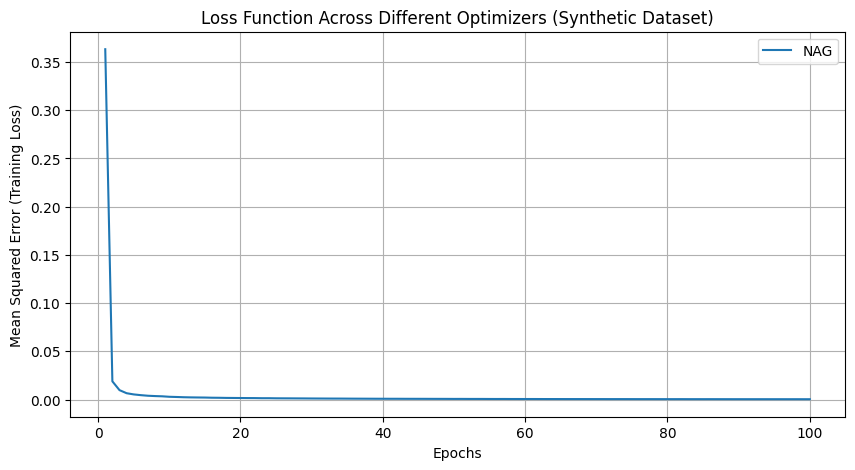

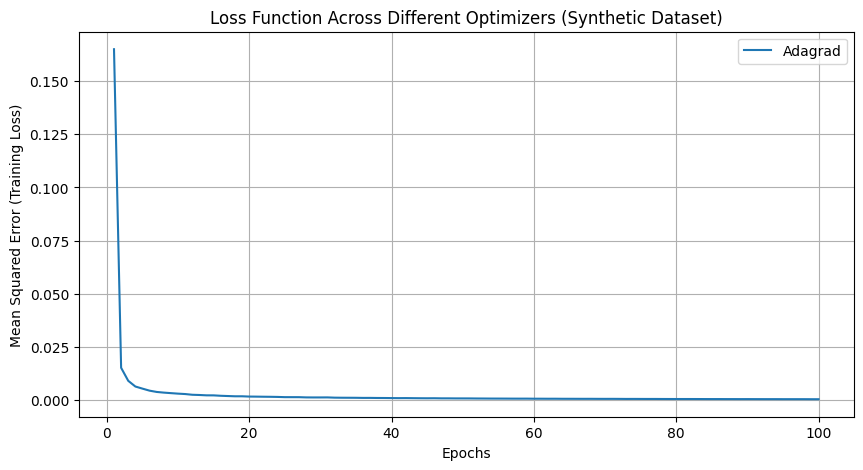

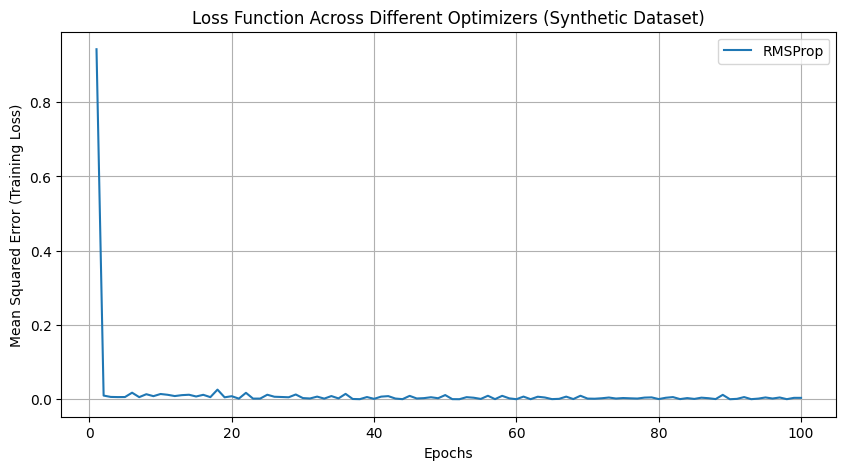

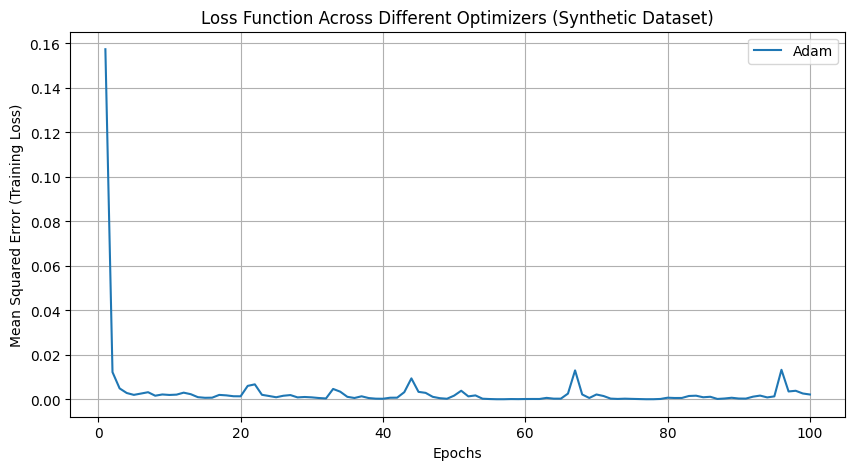

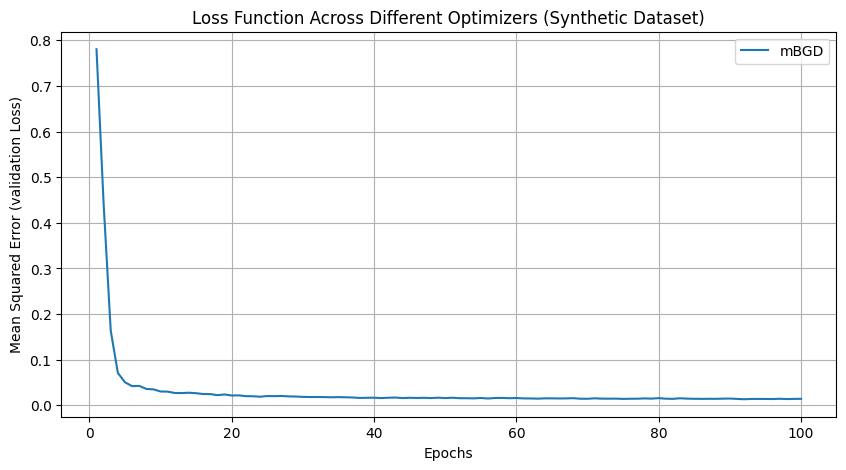

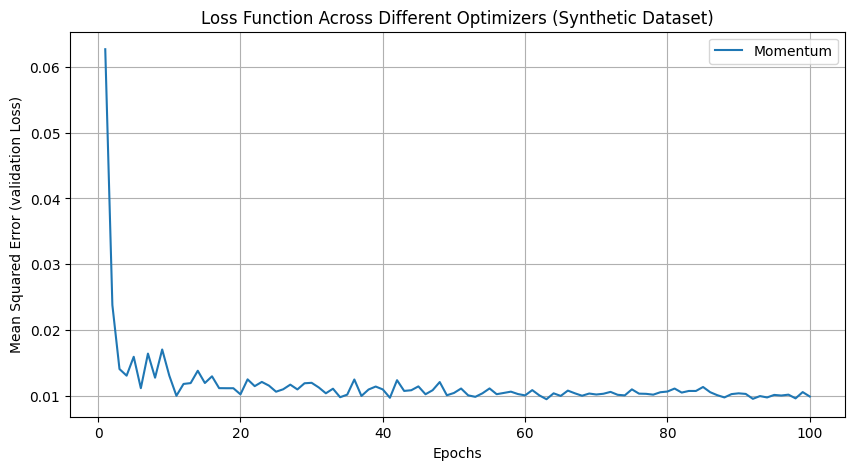

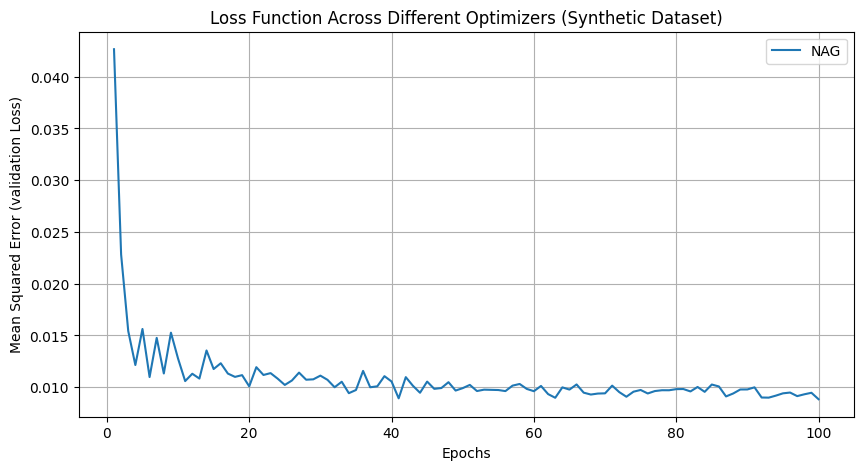

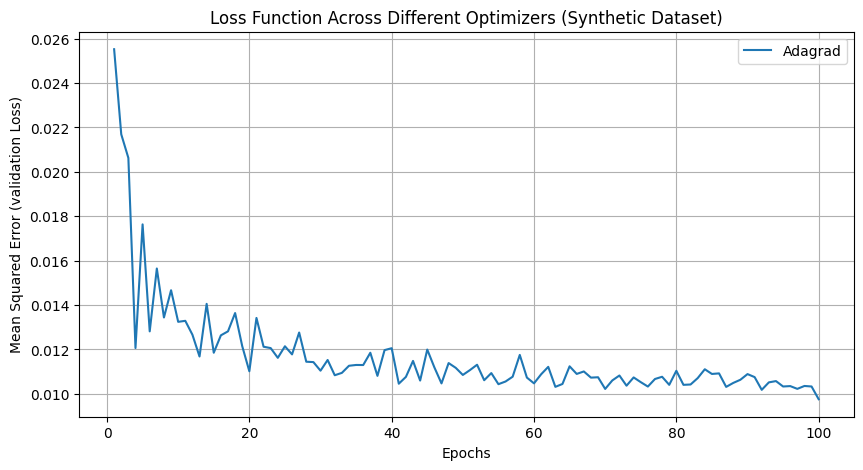

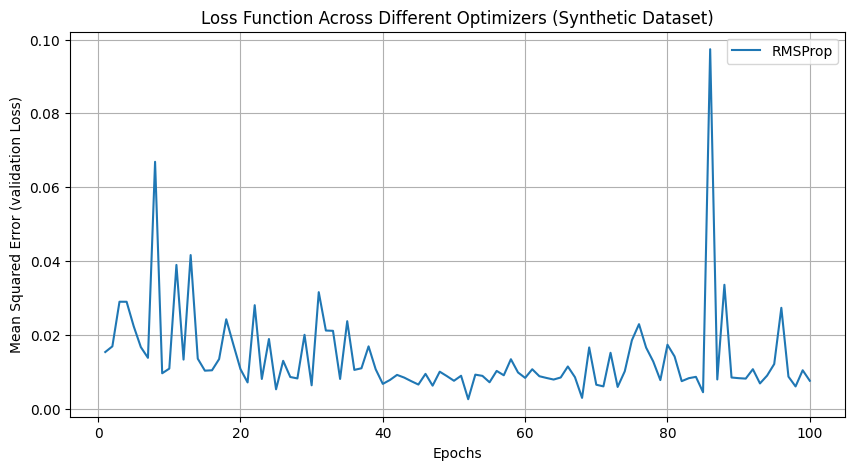

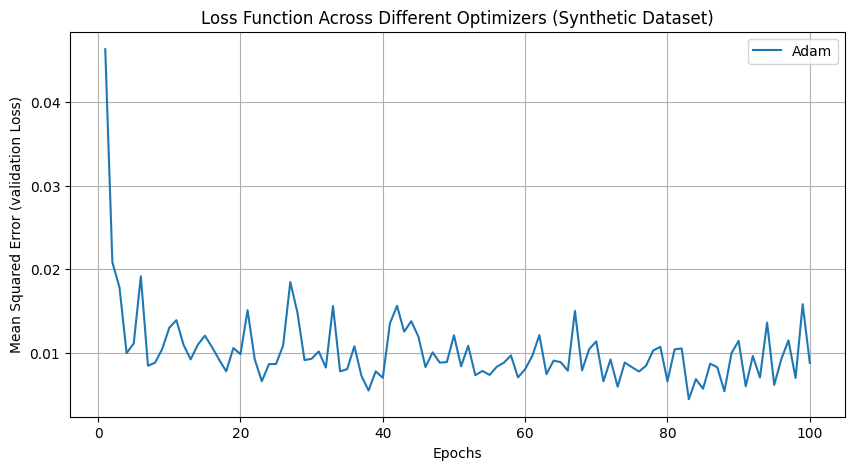

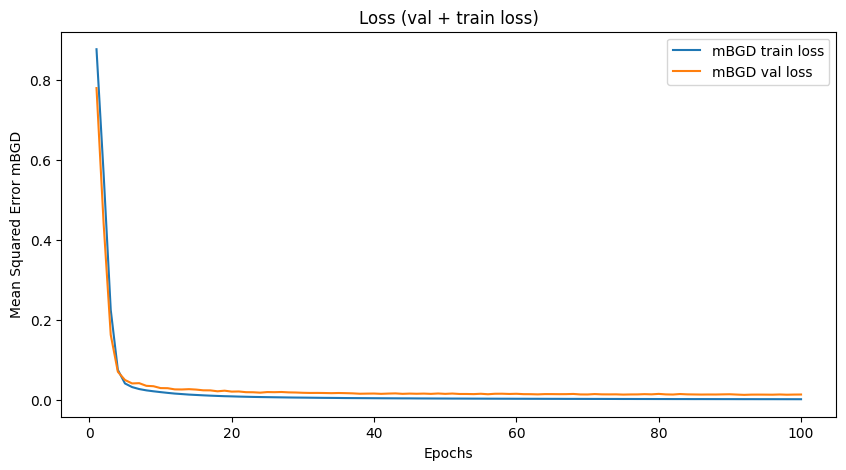

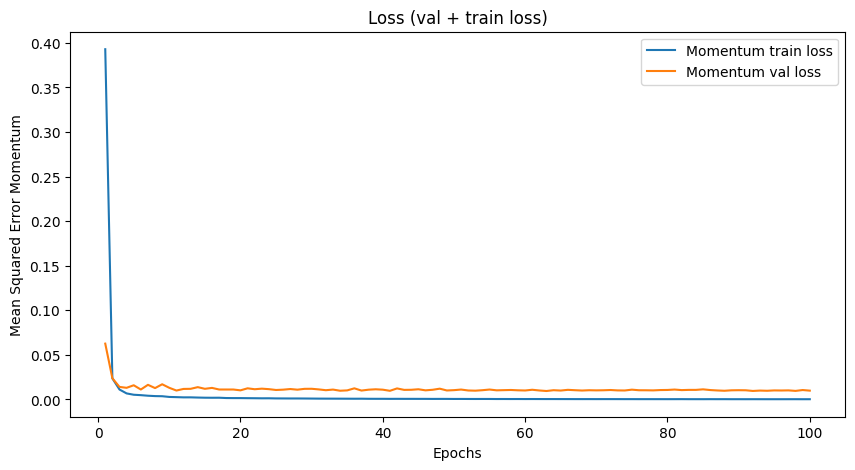

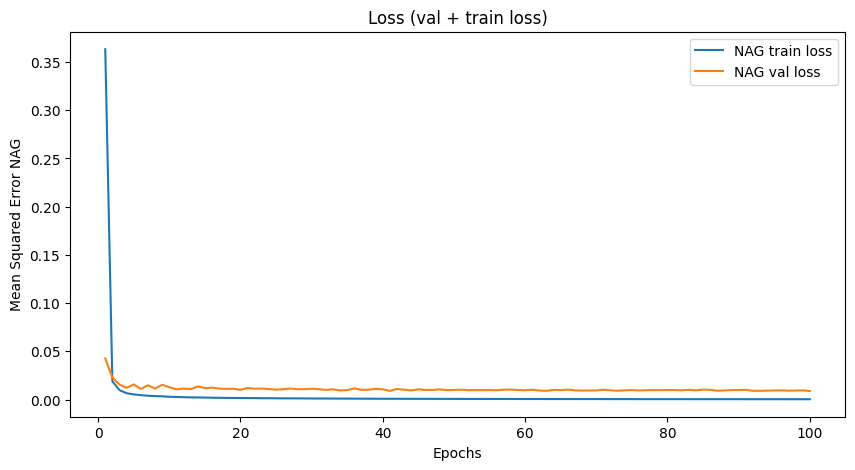

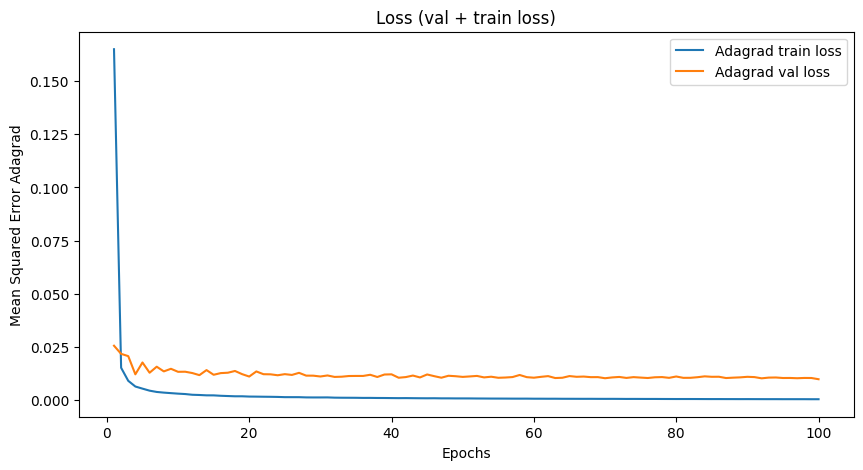

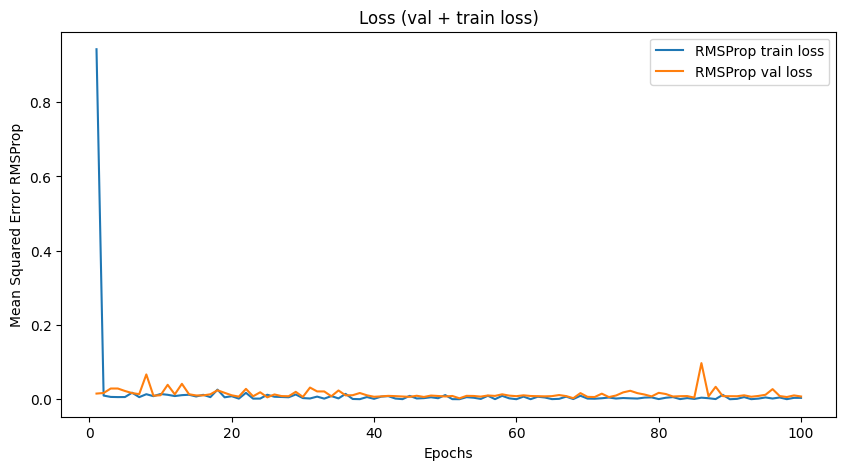

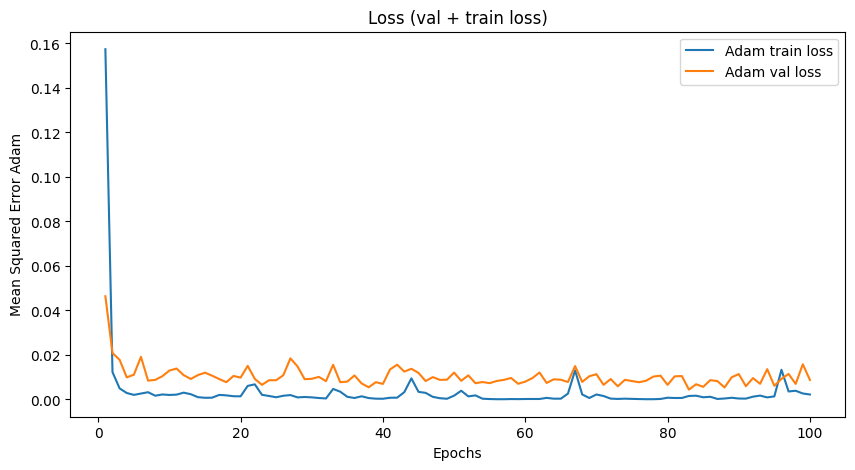

In [14]:
for name, loss in dict_Tloss.items():
    plt.figure(figsize=(10, 5))
    plt.title('Loss Function Across Different Optimizers (Synthetic Dataset)')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (Training Loss)')
    plt.plot(a,loss, label=name)
    plt.grid(True)
    plt.legend()
    #for c, d in zip(a, loss):
        #plt.annotate(text=f"{d:.3f}",xy=(c, d),fontsize=5)
    plt.savefig(f'Training loss {name}.png',dpi=500)
    plt.show()
#plt.savefig(f'combined training loss all.png',dpi=500)
#plt.show()

for name, loss in dict_Vloss.items():
    plt.figure(figsize=(10, 5))
    plt.title('Loss Function Across Different Optimizers (Synthetic Dataset)')
    plt.xlabel('Epochs')
    plt.ylabel(f'Mean Squared Error (validation Loss)')
    plt.plot(a,loss, label=name)
    plt.grid(True)
    plt.legend()
#    for c, d in zip(a, loss):
#        plt.annotate(text=f"({d:.3f})",xy=(c, d),fontsize=6)
    plt.savefig(f'validation loss {name}.png',dpi=500)
    plt.show()
#plt.savefig(f'combined validation loss all.png',dpi=500)
#plt.show()

for name, loss in dict_Vloss.items():
    plt.figure(figsize=(10, 5))
    plt.title('Loss (val + train loss)')
    plt.xlabel('Epochs')
    plt.ylabel(f'Mean Squared Error {name}')
    plt.plot(a,dict_Tloss[name],label=name+' train loss')
    plt.plot(a,dict_Vloss[name],label=name+" val loss")
    plt.legend()
    plt.savefig(f'combined train and val {name}.png',dpi=500)
    plt.show()




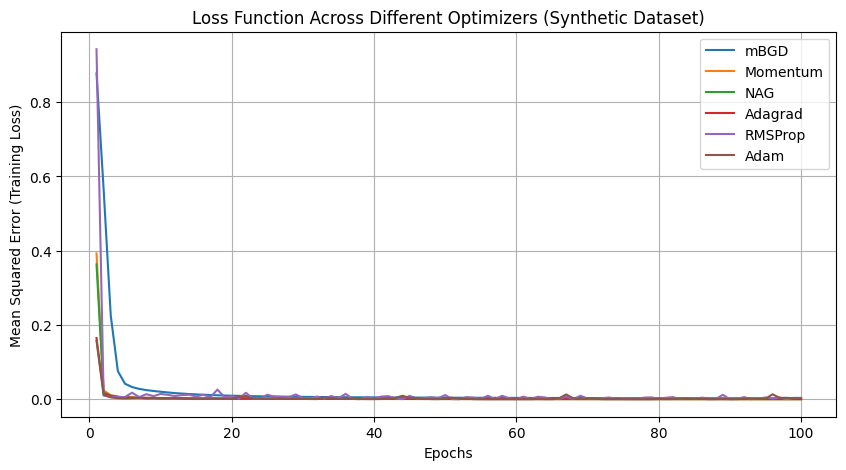

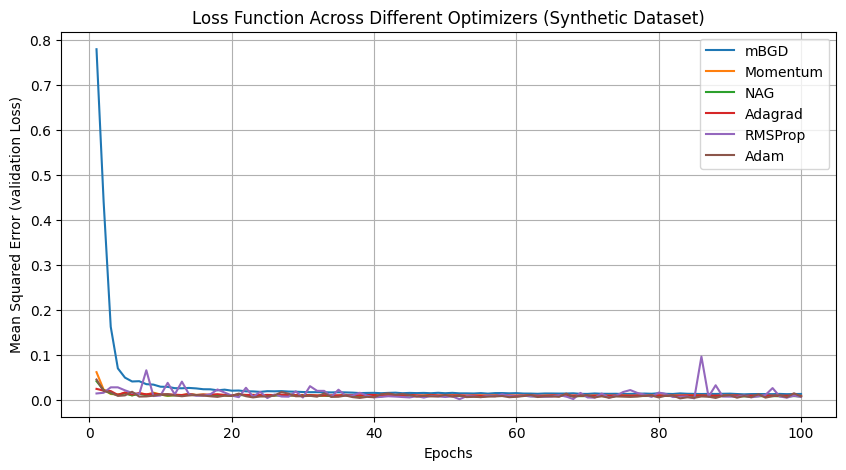

In [15]:
plt.figure(figsize=(10, 5))
for name, loss in dict_Tloss.items():
    plt.title('Loss Function Across Different Optimizers (Synthetic Dataset)')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (Training Loss)')
    plt.plot(a,loss, label=name)
    plt.grid(True)
    plt.legend()
plt.savefig(f'combined training loss all.png',dpi=500)
plt.show()

plt.figure(figsize=(10, 5))
for name, loss in dict_Vloss.items():
    plt.title('Loss Function Across Different Optimizers (Synthetic Dataset)')
    plt.xlabel('Epochs')
    plt.ylabel(f'Mean Squared Error (validation Loss)')
    plt.plot(a,loss, label=name)
    plt.grid(True)
    plt.legend()
plt.savefig(f'combined validation loss all.png',dpi=500)
plt.show()

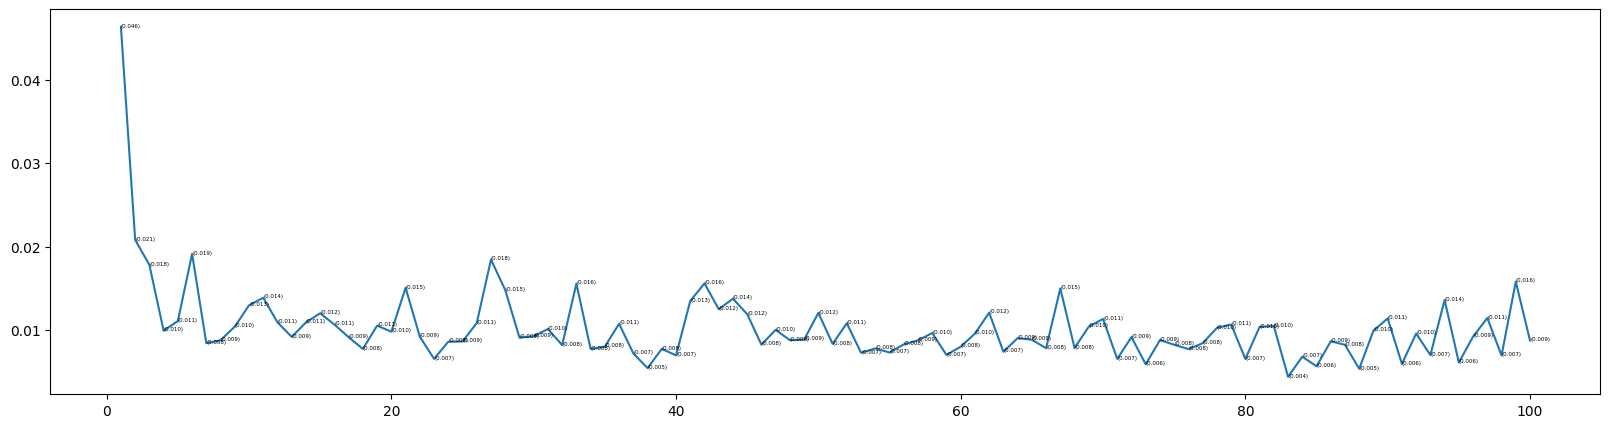

In [16]:
plt.figure(figsize=(20, 5))
plt.plot(a,dict_Vloss['Adam'])
for c, d in zip(a, dict_Vloss['Adam']):
    plt.annotate(text=f"({d:.3f})",xy=(c, d),fontsize=4)
plt.savefig('filename.png',dpi=700)
plt.show()


In [17]:

geeky_file = open('TrainingResults.txt', 'wt') 
geeky_file.write("train loss\n "+str(dict_Tloss)+"\nvalidation loss\n "+str(dict_Vloss)+"\n time\n "+str(dict_Tt)) 
geeky_file.close()

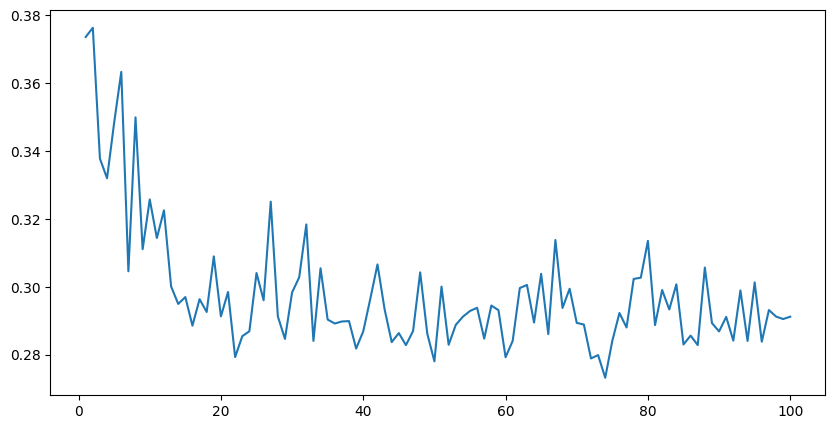

In [16]:
plt.figure(figsize=(10, 5))  # Adjust width (10) and height (5) as needed

# Plot the data
plt.plot(a,dict_Vloss['Adam'])

# Show the plot
plt.show()